<a href="https://colab.research.google.com/github/nandnimehla/AI-Project-on-Crime-Analysis-and-correlation-on-various-factors/blob/main/AI%20%20Crime%20Analysis%20and%20Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode , plot,iplot
import plotly.express as px
import plotly.graph_objects as go


from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()


     |████████████████████████████████| 1.0 MB 31.8 MB/s 
     |████████████████████████████████| 15.4 MB 50.7 MB/s 
     |████████████████████████████████| 6.3 MB 57.4 MB/s 


In [5]:
victims = pd.read_csv('/content/drive/MyDrive/archive (1)/20_Victims_of_rape.csv')
police_hr = pd.read_csv('/content/drive/MyDrive/archive (1)/35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('/content/drive/MyDrive/archive (1)/30_Auto_theft.csv')
prop_theft = pd.read_csv('/content/drive/MyDrive/archive (1)/10_Property_stolen_and_recovered.csv')

In [6]:
victims

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [7]:
rape_victims= victims[victims['Subgroup']=='Victims of Incest Rape']

In [8]:
rape_victims

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0
10,Andaman & Nicobar Islands,2004,Victims of Incest Rape,0,0,0,0,0,0,0,0
13,Andaman & Nicobar Islands,2005,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1036,West Bengal,2006,Victims of Incest Rape,6,0,0,0,6,0,6,0
1039,West Bengal,2007,Victims of Incest Rape,114,0,2,3,81,25,114,3
1042,West Bengal,2008,Victims of Incest Rape,9,0,2,1,1,0,9,5
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0


In [9]:
g= pd.DataFrame(rape_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())

In [10]:
g

,Year,Rape_Cases_Reported
0,2001,439
1,2002,369
2,2003,399
3,2004,505
4,2005,750
5,2006,431
6,2007,405
7,2008,309
8,2009,321
9,2010,288


In [11]:
g.columns=['Year','Cases Reported']

In [12]:
g.columns

Index(['Year', 'Cases Reported'], dtype='object')

In [13]:
g

,Year,Cases Reported
0,2001,439
1,2002,369
2,2003,399
3,2004,505
4,2005,750
5,2006,431
6,2007,405
7,2008,309
8,2009,321
9,2010,288


In [14]:
g1= pd.DataFrame(rape_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())

In [15]:
g1

,Area_Name,Rape_Cases_Reported
0,Andaman & Nicobar Islands,1
1,Andhra Pradesh,70
2,Arunachal Pradesh,0
3,Assam,101
4,Bihar,43
5,Chandigarh,17
6,Chhattisgarh,532
7,Dadra & Nagar Haveli,0
8,Daman & Diu,0
9,Delhi,231


In [16]:
g1.columns=['State/UT','Cases Reported']

In [17]:
g1.columns

Index(['State/UT', 'Cases Reported'], dtype='object')

In [18]:
g1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

In [19]:
g1

,State/UT,Cases Reported
0,Andaman & Nicobar Islands,1
1,Andhra Pradesh,70
2,Arunanchal Pradesh,0
3,Assam,101
4,Bihar,43
5,Chandigarh,17
6,Chhattisgarh,532
7,Dadra & Nagar Haveli,0
8,Daman & Diu,0
9,Delhi,231


In [20]:
shp_gdf = gpd.read_file('/content/drive/MyDrive/archive (1)/StateBoundary/StateBoundary.shp')

In [21]:
shp_gdf

,state,geometry
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,CHANDIGARH,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,DADAR & NAGAR HAVELI,"MULTIPOLYGON (((8137193.486 2315664.964, 81373..."
3,DAMAN & DIU,"MULTIPOLYGON (((8111624.471 2328002.898, 81117..."
4,DELHI,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
5,HARYANA,"POLYGON ((8524318.539 3516490.865, 8524451.392..."
6,JHARKHAND,"POLYGON ((9762288.285 2772949.712, 9762301.816..."
7,KARNATAKA,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
8,KERALA,"POLYGON ((8347733.191 1436381.747, 8347795.745..."
9,LAKSHADWEEP,"MULTIPOLYGON (((8135256.290 930182.487, 813526..."


In [22]:
shp_gdf['state'] = shp_gdf['state'].str.title()

In [23]:
merge =shp_gdf.set_index('state').join(g1.set_index('State/UT'))

In [24]:
merge

,geometry,Cases Reported
Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",NaN
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",70.0
Arunachal Pradesh,"POLYGON ((10696175.277 3434232.650, 10696981.8...",NaN
Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",101.0
Bihar,"POLYGON ((9362949.333 3188807.607, 9362966.106...",43.0
Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",17.0
Chhattisgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",532.0
Dadar & Nagar Haveli,"MULTIPOLYGON (((8137193.486 2315664.964, 81373...",NaN
Daman & Diu,"MULTIPOLYGON (((8111624.471 2328002.898, 81117...",0.0
Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",231.0


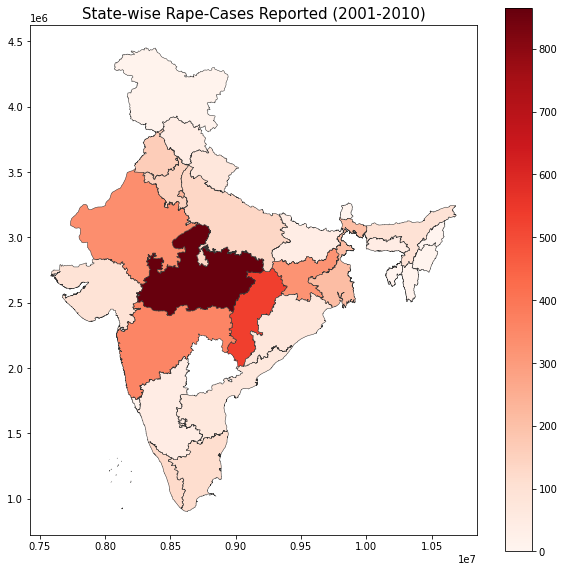

In [25]:
fig,ax=plt.subplots(1, figsize=(10,10))

ax.set_title('State-wise Rape-Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merge.plot(column='Cases Reported', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [28]:
g2= pd.DataFrame(police_hr.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())

In [29]:
g2.columns= ['State/UT','Cases Reported']

In [30]:
g2

,State/UT,Cases Reported
0,Andhra Pradesh,226.0
1,Arunachal Pradesh,40.0
2,Assam,302.0
3,Bihar,52.0
4,Chandigarh,2.0
5,Chhattisgarh,624.0
6,Daman & Diu,0.0
7,Delhi,24.0
8,Goa,6.0
9,Gujarat,226.0


In [31]:
g2.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('/content/drive/MyDrive/archive (1)/StateBoundary/StateBoundary.shp')
shp_gdf['state'] = shp_gdf['state'].str.title()
merged = shp_gdf.set_index('state').join(g2.set_index('State/UT'))
#shp_gdf['state'] = shp_gdf['state'].str.title()

In [32]:
shp_gdf

,state,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Dadar & Nagar Haveli,"MULTIPOLYGON (((8137193.486 2315664.964, 81373..."
3,Daman & Diu,"MULTIPOLYGON (((8111624.471 2328002.898, 81117..."
4,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
5,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."
6,Jharkhand,"POLYGON ((9762288.285 2772949.712, 9762301.816..."
7,Karnataka,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
8,Kerala,"POLYGON ((8347733.191 1436381.747, 8347795.745..."
9,Lakshadweep,"MULTIPOLYGON (((8135256.290 930182.487, 813526..."


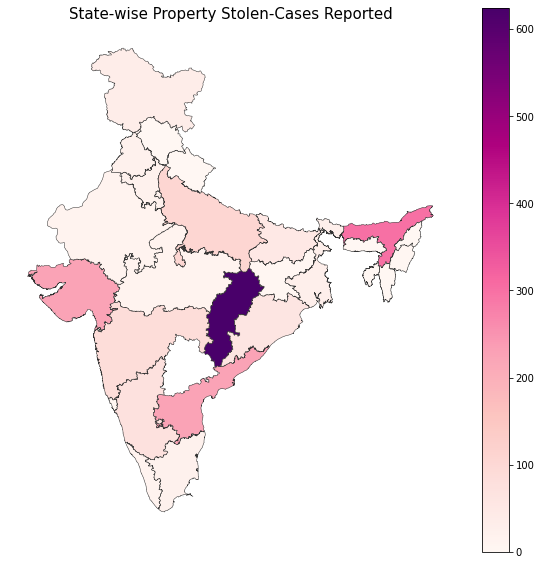

In [33]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [35]:
police_hr.Group_Name.value_counts()

HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Extortion                                  190
HR_Disappearance of Persons                   190
HR_Torture                                    190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Indignity to Women                         185
HR_Fake encounter killings                    185
HR_Violation against Terrorists/Extremists    182
HR_False implication                          182
HR_Failure in taking action                   181
Name: Group_Name, dtype: int64

In [36]:
fake_enc_df = police_hr[police_hr['Group_Name']=='HR_Fake encounter killings'] 
fake_enc_df.Cases_Registered_under_Human_Rights_Violations.sum()

16.0

In [37]:
false_imp_df = police_hr[police_hr['Group_Name']=='HR_False implication'] 
false_imp_df.Cases_Registered_under_Human_Rights_Violations.sum()

29.0

In [38]:
g4 = pd.DataFrame(police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())

In [39]:
g4

,Year,Policemen_Chargesheeted,Policemen_Convicted
0,2001,270.0,4.0
1,2002,118.0,0.0
2,2003,46.0,20.0
3,2004,44.0,0.0
4,2005,42.0,0.0
5,2006,56.0,0.0
6,2007,74.0,0.0
7,2008,28.0,16.0
8,2009,166.0,116.0
9,2010,28.0,8.0


In [82]:
Autotheft = pd.read_csv("/content/drive/MyDrive/archive (1)/30_Auto_theft.csv")
Autotheft.Year.unique()
Autotheft.Area_Name.unique()
Autotheft.Sub_Group_Name.unique()
Autotheft.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946
5,Chandigarh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,107.0,281
6,Chhattisgarh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,338.0,790
7,Dadra & Nagar Haveli,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,12
8,Delhi,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,62.0,688.0,3185
9,Goa,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,9.0,68.0,152


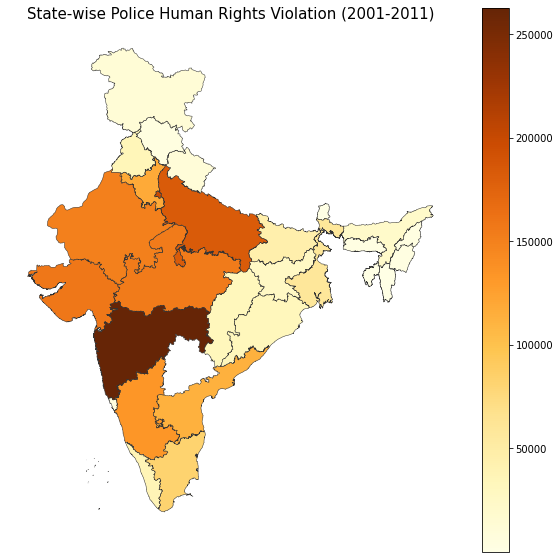

In [45]:
g5 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g5.columns = ['State/UT','Vehicle_Stolen']
g5.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('/content/drive/MyDrive/archive (1)/StateBoundary/StateBoundary.shp')
shp_gdf['state'] = shp_gdf['state'].str.title()
merged = shp_gdf.set_index('state').join(g5.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Police Human Rights Violation (2001-2011)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='YlOrBr', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

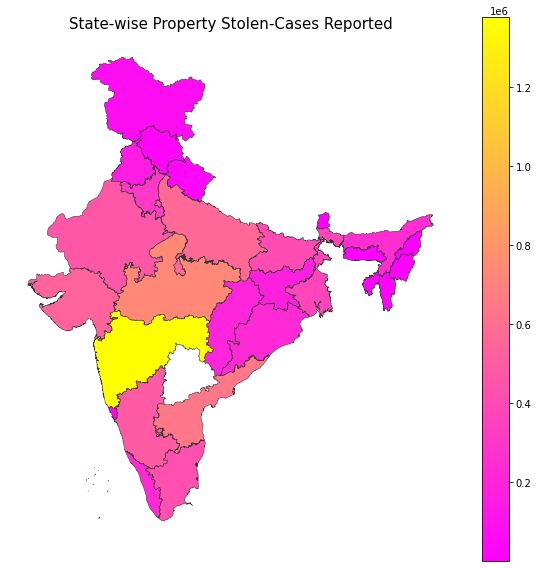

In [49]:
g7 = pd.DataFrame(prop_theft.groupby(['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
g7.columns = ['State/UT','Cases Reported']
g7.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('/content/drive/MyDrive/archive (1)/StateBoundary/StateBoundary.shp')
shp_gdf['state'] = shp_gdf['state'].str.title()
merged = shp_gdf.set_index('state').join(g7.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='spring', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [80]:
murder = pd.read_csv("/content/drive/MyDrive/archive (1)/32_Murder_victim_age_sex.csv")
murder.Year.unique()
murder.Area_Name.unique()
murder.Sub_Group_Name.unique()
murder.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
5,Chandigarh,2001,Murder - Female Victims,2. Female Victims,3.0,5,0.0,0.0,0.0,1.0,1.0
6,Chhattisgarh,2001,Murder - Female Victims,2. Female Victims,63.0,549,14.0,38.0,38.0,214.0,182.0
7,Delhi,2001,Murder - Female Victims,2. Female Victims,14.0,152,2.0,12.0,9.0,74.0,41.0
8,Goa,2001,Murder - Female Victims,2. Female Victims,1.0,13,NaN,NaN,NaN,4.0,8.0
9,Gujarat,2001,Murder - Female Victims,2. Female Victims,26.0,363,9.0,57.0,8.0,132.0,131.0


In [81]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2693755" data-url="https://flo.uri.sh/visualisation/2693755/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

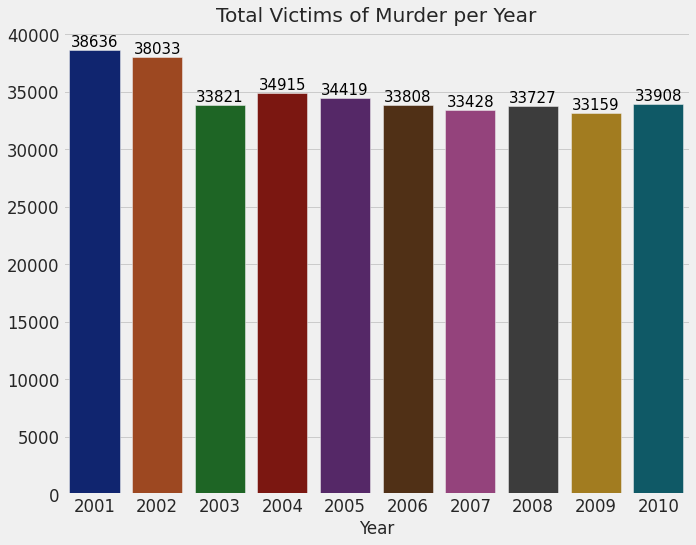

In [89]:
import seaborn as sns
murdert = murder[murder['Sub_Group_Name']== '3. Total']  #keeping only total category of subgroup
murdery = murdert.groupby(['Year'])['Victims_Total'].sum().reset_index() #grouping
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'Year' , y = 'Victims_Total' , data = murdery ,palette= 'dark') #plotting bar graph
plt.title("Total Victims of Murder per Year")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')


In [86]:
Autotheft = pd.read_csv("/content/drive/MyDrive/archive (1)/30_Auto_theft.csv")
Autotheft.Year.unique()
Autotheft.Area_Name.unique()
Autotheft.Sub_Group_Name.unique()
Autotheft.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946
5,Chandigarh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,107.0,281
6,Chhattisgarh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,338.0,790
7,Dadra & Nagar Haveli,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,12
8,Delhi,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,62.0,688.0,3185
9,Goa,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,9.0,68.0,152


In [83]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/7937658"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [84]:
Hrv_police = pd.read_csv("/content/drive/MyDrive/archive (1)/35_Human_rights_violation_by_police.csv")
Hrv_police.Year.unique()
Hrv_police.Area_Name.unique()
Hrv_police.Sub_Group_Name.unique()
Hrv_police.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
5,Chhattisgarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
6,Gujarat,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
7,Haryana,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
8,Himachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
9,Jammu & Kashmir,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0


In [85]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/7941682"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [87]:
serious_fraud = pd.read_csv("/content/drive/MyDrive/archive (1)/31_Serious_fraud.csv")
serious_fraud.Year.unique()
serious_fraud.Area_Name.unique()
serious_fraud.Sub_Group_Name.unique()
serious_fraud.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Loss_of_Property_1_10_Crores,Loss_of_Property_10_25_Crores,Loss_of_Property_25_50_Crores,Loss_of_Property_50_100_Crores,Loss_of_Property_Above_100_Crores
0,Andhra Pradesh,2001,Serious Fraud - Cheating,2. Cheating,4.0,0.0,0.0,0.0,0.0
1,Arunachal Pradesh,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0
4,Chandigarh,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0
5,Chhattisgarh,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0
6,Delhi,2001,Serious Fraud - Cheating,2. Cheating,2.0,NaN,NaN,NaN,NaN
7,Goa,2001,Serious Fraud - Cheating,2. Cheating,2.0,NaN,NaN,NaN,NaN
8,Gujarat,2001,Serious Fraud - Cheating,2. Cheating,14.0,0.0,1.0,1.0,0.0
9,Haryana,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0


In [88]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/7941710"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

Text(0, 0.5, '')

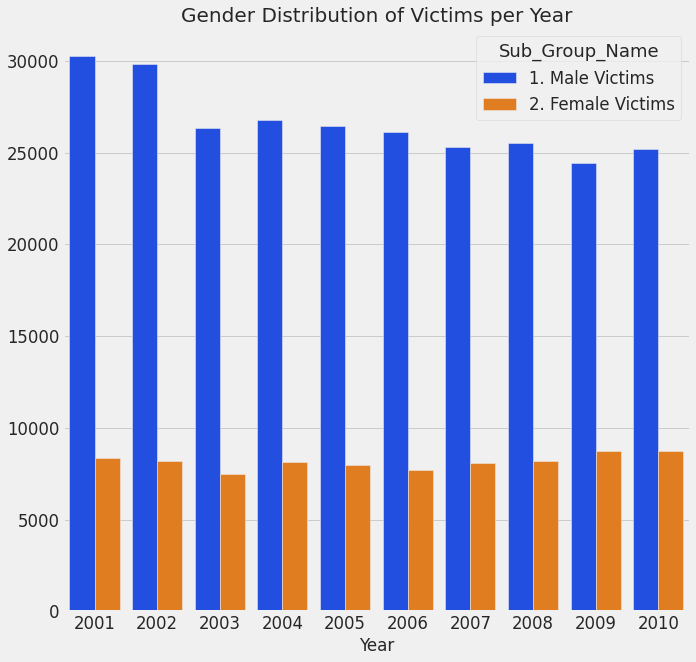

In [90]:
murderg = murder.groupby(['Year' , 'Sub_Group_Name'])['Victims_Total'].sum().reset_index() # grouping with year and sub group
murderg = murderg[murderg['Sub_Group_Name']!= '3. Total']   # we dont need total category of sub group

plt.style.use("fivethirtyeight")
plt.figure(figsize = (10,10))
ax = sns.barplot( x = 'Year', y = 'Victims_Total' , hue = 'Sub_Group_Name' , data = murderg ,palette= 'bright') #plotting barplot
plt.title('Gender Distribution of Victims per Year',size = 20)
ax.set_ylabel('')

Text(0, 0.5, '')

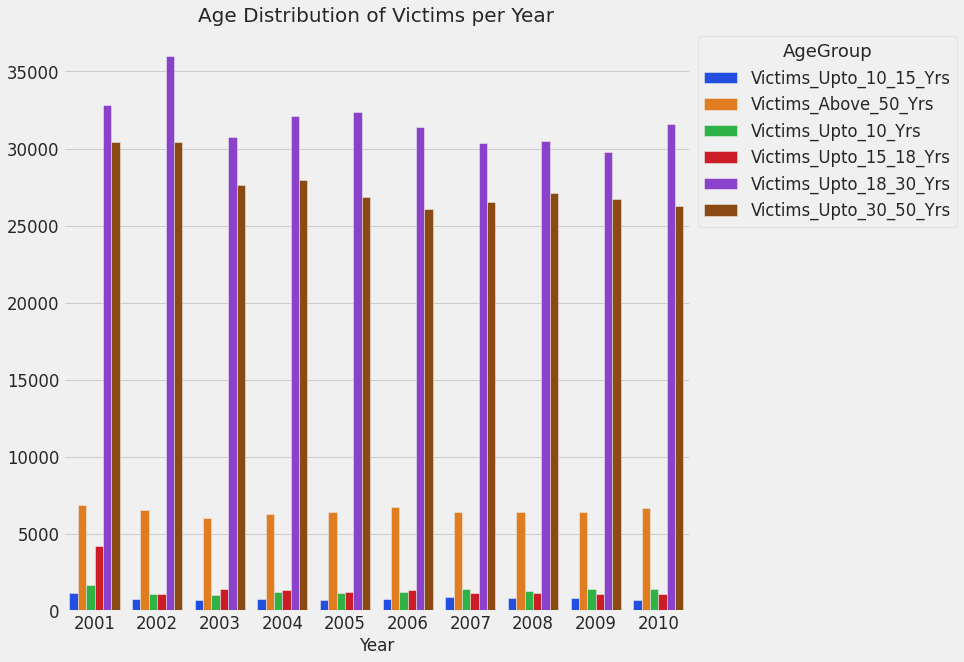

In [91]:
murdera = murder.groupby(['Year'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs',
                                   'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                   'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index()  #grouby year and age group
murdera = murdera.melt('Year', var_name='AgeGroup',  value_name='vals') #melting the dataset

plt.style.use("fivethirtyeight")
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'Year' , y = 'vals',hue = 'AgeGroup' ,data = murdera ,palette= 'bright') #plotting a bar
plt.title('Age Distribution of Victims per Year',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1)) #anchoring the labels so that they dont show up on the graph
ax.set_ylabel('')

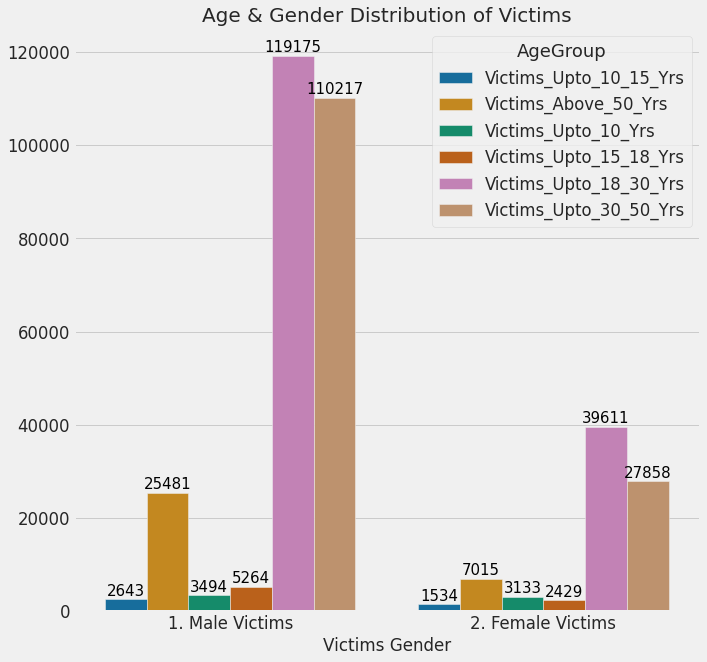

In [92]:
murderag = murder.groupby(['Sub_Group_Name'])['Victims_Upto_10_15_Yrs',
                                              'Victims_Above_50_Yrs', 'Victims_Upto_10_Yrs',
                                              'Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs',
                                              'Victims_Upto_30_50_Yrs',].sum().reset_index()       #grouping with the gender and age groups

murderag = murderag.melt('Sub_Group_Name', var_name='AgeGroup',  value_name='vals')  #melting the dataset for drawing the desired plot
murderag= murderag[murderag['Sub_Group_Name']!= '3. Total']

plt.style.use("fivethirtyeight")
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'Sub_Group_Name' , y = 'vals',hue = 'AgeGroup' ,data = murderag,palette= 'colorblind') #making barplot taking Agegroup as hue/category 
plt.title('Age & Gender Distribution of Victims',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1)) #using anchor so that legend doesnt show on the graph
ax.set_ylabel('')
ax.set_xlabel('Victims Gender')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

CRIME AGAINST WOMEN

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [51]:
crime12 = pd.read_csv('/content/drive/MyDrive/archive (1)/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [52]:
crime13 = pd.read_csv('/content/drive/MyDrive/archive (1)/crime/42_District_wise_crimes_committed_against_women_2013.csv')

In [53]:
crime12.columns = crime12.columns.str.upper()
crime13.columns = crime13.columns.str.upper()
crime13['STATE/UT'] = crime13['STATE/UT'].str.upper()
crime13['DISTRICT'].replace('ZZ TOTAL', 'TOTAL', inplace = True)

In [54]:
dataframe = pd.concat([crime12, crime13])

In [55]:
dataframe.head()

,STATE/UT,DISTRICT,YEAR,RAPE,KIDNAPPING AND ABDUCTION,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [56]:
dataframe.fillna(value = 0, inplace= True)

In [57]:
total_crime = dataframe[dataframe['DISTRICT'] == 'TOTAL']

In [58]:
punjab_crime = total_crime[total_crime['STATE/UT'] == 'PUNJAB']

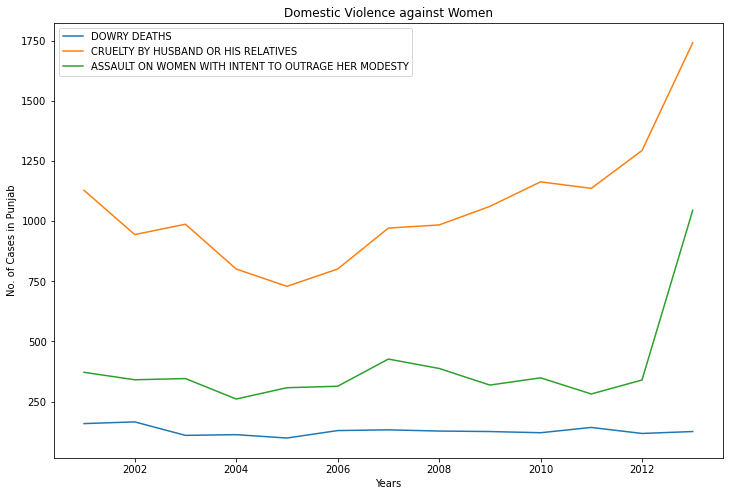

In [59]:
punjab_crime.set_index('YEAR')[['DOWRY DEATHS', 'CRUELTY BY HUSBAND OR HIS RELATIVES','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']].plot(kind = 'line', figsize = (12,8))
plt.xlabel('Years')
plt.ylabel('No. of Cases in Punjab')
plt.title('Domestic Violence against Women')
plt.show()

In [60]:
data24 = dataframe[(dataframe['DISTRICT'] == 'TOTAL') & (dataframe['YEAR'] == 2013)]

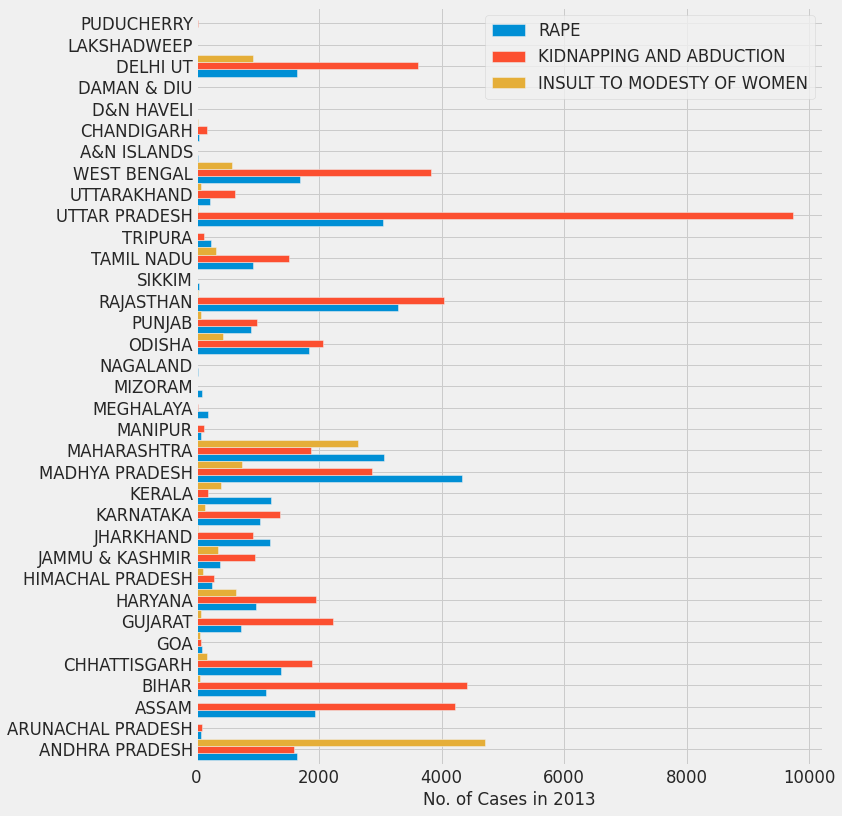

In [96]:
allstates24 = data24[['RAPE', 'KIDNAPPING AND ABDUCTION','INSULT TO MODESTY OF WOMEN']].plot(kind = 'barh', figsize = (10,13), width = 1)
allstates24.set_xlabel('No. of Cases in 2013')
allstates24.set_yticklabels(data24['STATE/UT'])
plt.show()

In [62]:
crimes = dataframe.groupby('STATE/UT').sum()

In [63]:
crimes.drop('YEAR', axis= 1, inplace= True)

In [64]:
crimes['TOTAL'] = 0

In [65]:
for i in range(len(crimes.index)):
    crimes['TOTAL'][i] = crimes.iloc[i].sum()

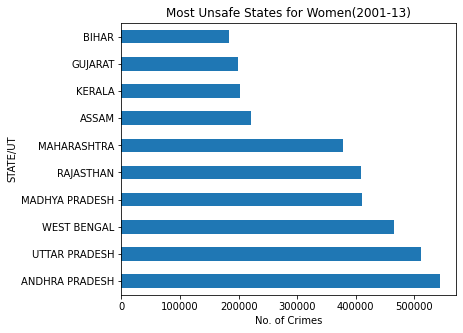

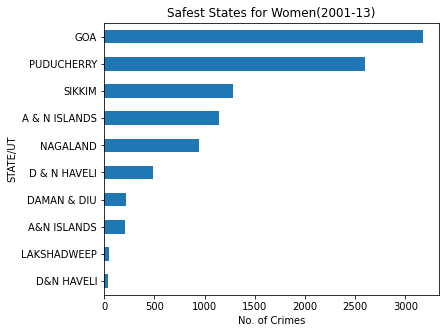

In [66]:
max_crimes = crimes['TOTAL'].nlargest(10).plot(kind = 'barh', title = 'Most Unsafe States for Women(2001-13)', figsize = (6,5))
plt.xlabel('No. of Crimes')
plt.show()
min_crimes = crimes['TOTAL'].nsmallest(10).plot(kind = 'barh', title = 'Safest States for Women(2001-13)', figsize = (6,5))
plt.xlabel('No. of Crimes')
plt.show()

In [67]:
dataframe.head()

,STATE/UT,DISTRICT,YEAR,RAPE,KIDNAPPING AND ABDUCTION,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [68]:
def setHighCrime(df):
    '''Function to set value of highCrime depending on ViolentCrimesPerPop'''
    if df['DOWRY DEATHS'] > 7:
        return True
    else:
        return False
    
# Adding a new field "highCrime"
dataframe['highCrime'] = dataframe.apply(setHighCrime, axis=1)

# Calculating the percentage of positive and negative instances in the dataset
percentage_intances = dataframe.groupby('highCrime').size() * 100 / len(dataframe)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

highCrime
False    57.337398
True     42.662602
dtype: float64
------------------
Percentage Positive Instance = 42.66260162601626
Percentage Negative Instance = 57.33739837398374 


In [69]:
X = dataframe.drop('RAPE', axis=1).drop('IMPORTATION OF GIRLS', axis=1).drop('INSULT TO MODESTY OF WOMEN', axis=1).drop('CRUELTY BY HUSBAND OR HIS RELATIVES', axis=1).drop('STATE/UT', axis=1).drop('DOWRY DEATHS', axis=1).drop('DISTRICT', axis=1).drop('ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', axis=1).drop('KIDNAPPING AND ABDUCTION', axis=1).drop('highCrime', axis=1)

y = dataframe["highCrime"]

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .50,random_state = 10)

In [71]:
y_test

192     False
1636    False
4035    False
473     False
5154     True
        ...  
2266     True
3990     True
1241    False
2878    False
4489    False
Name: highCrime, Length: 4920, dtype: bool

In [72]:
testing = [x_test,y_test]

In [73]:
result = pd.concat(testing,axis = 1)

In [74]:
import seaborn as sns
sns.set()
result = result.set_index('YEAR')

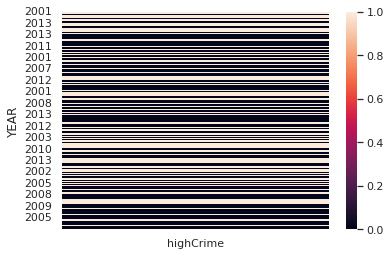

In [75]:
sns.heatmap(result)
plt.show()

In [76]:
print(result)

      highCrime
YEAR           
2001      False
2003      False
2006      False
2013      False
2008       True
...         ...
2004       True
2006       True
2002      False
2004      False
2007      False

[4920 rows x 1 columns]


In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_curve, roc_curve, auc, log_loss
import numpy as np
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)
logreg_accy = round(accuracy_score(y_pred,y_test), 3)
print (logreg_accy)

0.568


In [79]:
print (classification_report(y_test, y_pred, labels=logreg.classes_))
print (confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.57      1.00      0.72      2795
        True       0.00      0.00      0.00      2125

    accuracy                           0.57      4920
   macro avg       0.28      0.50      0.36      4920
weighted avg       0.32      0.57      0.41      4920

[[2795 2125]
 [   0    0]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
state_ratio = pd.read_excel('/content/drive/MyDrive/sex_ratio of states.xlsx')

In [ ]:
g2.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('/content/drive/MyDrive/archive (1)/StateBoundary/StateBoundary.shp')
shp_gdf['state'] = shp_gdf['state'].str.title()
merged = shp_gdf.set_index('state').join(g2.set_index('State/UT'))

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
from plotly.offline import iplot

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Literacy Data 2011.csv",index_col=False)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,District,State,Literacy
0,Thane,Maharashtra,84.53
1,North Twenty Four Parganas,West Bengal,84.06
2,Bangalore,Karnataka,87.67
3,Pune,Maharashtra,86.15
4,Mumbai Suburban,Maharashtra,89.91


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



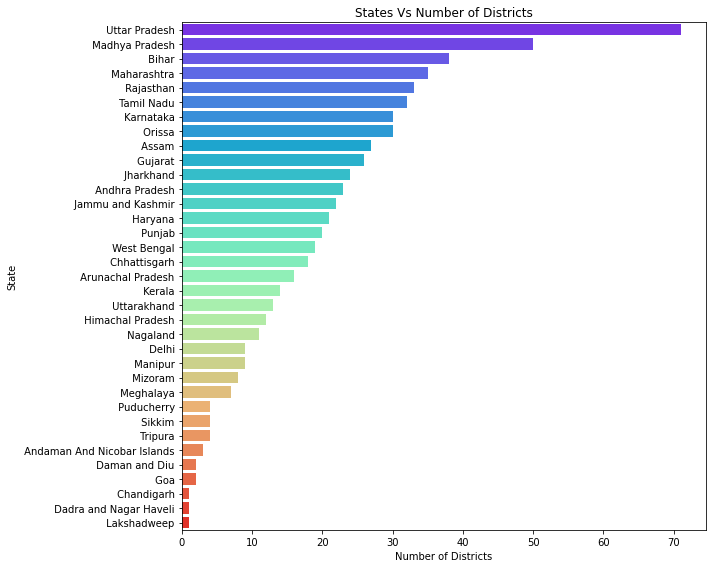

In [ ]:
Data=df.groupby(by="State")["District"].count()
df2=pd.DataFrame(Data)
States=list(df2.index)

NumberOfDistricts=[]
for i in States:
    NumberOfDistricts.append(df2.loc[i].District)
NumberOfDistricts
List=sorted(list(zip(States,NumberOfDistricts)),key = lambda x: x[1],reverse=True)


# For the Plot 
X=[i[0] for i in List]
Y=[i[1] for i in List]
plt.figure(figsize=(10,8))
plt.xlabel("Number of Districts")
plt.ylabel("State")
plt.title("States Vs Number of Districts")
sns.barplot(Y,X,palette='rainbow')
plt.tight_layout()

In [ ]:
print("State with the most number of districts : {}".format(List[0][0]))
print("State with the least number of districts : {}".format(List[-1][0]))

State with the most number of districts :  Uttar Pradesh
State with the least number of districts :  Lakshadweep


In [ ]:
#Plotting to see the Literacy rate of each district of a state say for example West Bengal
WB_df=df[df.State==' West Bengal']

fig = px.bar(WB_df[['District', 'Literacy']].sort_values('Literacy', ascending=False), 
             y="Literacy", x="District", color='District', 
             log_y=True,title='Literacy of different Districts in West Bengal')

fig.show()

In [ ]:
print("District with most literacy in WB : {}".format(list(WB_df.sort_values(by='Literacy',inplace=False,ascending=False)['District'])[0]))
print("District with least literacy in WB : {}".format(list(WB_df.sort_values(by='Literacy',inplace=False,ascending=False)['District'])[-1]))

District with most literacy in WB :  Purba Medinipur
District with least literacy in WB :  Uttar Dinajpur


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



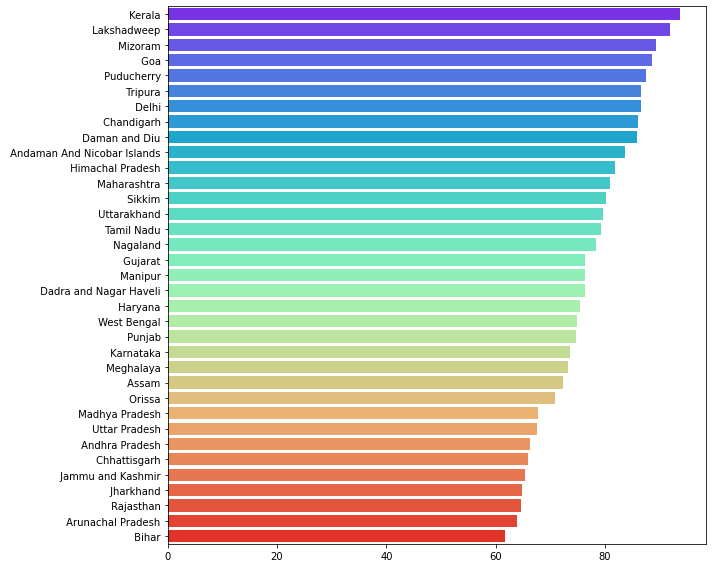

In [ ]:
#Plotting to see the Average literacy of each state of India
Data=df.groupby(by="State")["Literacy"].mean()
df6=pd.DataFrame(Data)
States=list(df6.index)

Literacy=[]
for i in States:
    Literacy.append(df6.loc[i].Literacy)

    
    
List2=sorted(list(zip(States,Literacy)),key = lambda x: x[1],reverse=True)
import seaborn as sns
import matplotlib.pyplot as plt

X2=[i[0] for i in List2]
Y2=[i[1] for i in List2]
plt.figure(figsize=(10,8))
sns.barplot(Y2,X2,palette='rainbow')
plt.tight_layout()


In [ ]:
print("The most literate state of India is : {}({:.2f})".format(List2[0][0],List2[0][1]))
print("The least literate state of India is : {}({:.2f})".format(List2[0-1][0],List2[-1][1]))

The most literate state of India is :  Kerala(93.70)
The least literate state of India is :  Bihar(61.76)


In [ ]:
import matplotlib.pyplot # Just in case.
import plotly.express as px #Easy way to plot charts
import plotly.graph_objects as go #Does the same thing. Gives more options.
import plotly as ply # The whole package
from plotly.subplots import make_subplots #As the name suggests, for subplots.
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GOI.csv") 

In [ ]:
df.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [ ]:
df.isnull().sum()

Category                                   0
Country/ States/ Union Territories Name    0
Literacy Rate (Persons) - Total - 2001     0
Literacy Rate (Persons) - Total - 2011     0
Literacy Rate (Persons) - Rural - 2001     0
Literacy Rate (Persons) - Rural - 2011     0
Literacy Rate (Persons) - Urban - 2001     0
Literacy Rate (Persons) - Urban - 2011     0
dtype: int64

In [ ]:
#We have data for two years 2011 and 2001 which have a difference of a decade between them. We can generate new attribute to see the percentage change in litercy rate over the decade.
df['Total - Per. Change'] = (df.loc[:,'Literacy Rate (Persons) - Total - 2011'] - 
                df.loc[:,'Literacy Rate (Persons) - Total - 2001'])/df.loc[:,'Literacy Rate (Persons) - Total - 2001']
df['Rural - Per. Change'] = (df.loc[:,'Literacy Rate (Persons) - Rural - 2011'] - 
                df.loc[:,'Literacy Rate (Persons) - Rural - 2001'])/df.loc[:,'Literacy Rate (Persons) - Total - 2001']
df['Urban - Per. Change'] = (df.loc[:,'Literacy Rate (Persons) - Urban - 2011'] - 
                df.loc[:,'Literacy Rate (Persons) - Urban - 2001'])/df.loc[:,'Literacy Rate (Persons) - Total - 2001']

In [ ]:
## Column names are too long, I don't need that much info in a column name. So, i am altering the names.
new_col=[]
for i in df.columns:
    new_col.append(i.split('(Persons) - ')[-1])
df.columns=new_col

In [ ]:
df.head()

,Category,Country/ States/ Union Territories Name,Total - 2001,Total - 2011,Rural - 2001,Rural - 2011,Urban - 2001,Urban - 2011,Total - Per. Change,Rural - Per. Change,Urban - Per. Change
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1,0.126543,0.140432,0.064815
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1,0.107438,0.097521,0.066116
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9,0.204420,0.222836,0.084715
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5,0.140600,0.151659,0.050553
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9,0.314894,0.338298,0.106383


In [ ]:
#We have data of the whole country and the states and union territories. I am going to view the overall Literacy rates of the country and then we'll remove this from our dataset. So that it is easy for us to view and compare literacy rates amongst States/ Union Territories.
#overall literacy rate in india
India = df[df['Category'] == 'Country'].T
India = India.iloc[2:8,:]
India.reset_index(inplace=True)
India.columns = ['Measure', 'Value']
India.loc[:,'Measure'] = India['Measure'].apply(lambda x : str(x).split(' -')[0])
India_2001 = India.iloc[[0,2,4],:]
India_2011 = India.iloc[[1,3,5],:]
fig = go.Figure(data=[
    go.Bar(name='2001', x=India_2001['Measure'], y=India_2001['Value'], marker_color='rgb(55, 83, 109)'),
    go.Bar(name='2011', x=India_2011['Measure'], y=India_2011['Value'], marker_color='rgb(26, 118, 255)')
])
fig.update_layout(barmode='group', title='Overall Literacy Rate in India :')
fig.show()


Insights:
 

*  Total literacy rate in india has incresed by 8.2 units in previous dacade. That is an increse of 12.65% in the previous measure.

*   Literacy rate in rural india has incresed by 9.1 units in the previous dacade. That is an increse of 14.04% in the precious measure.
*   Literacy rate in urban india has incresed by 4.5 units in the previous decade. That is an increse of 14.04% in the precious measure.






In [ ]:
df = df.iloc[1:,:] #Removing data for India as a whole country.
df.rename(columns={'Country/ States/ Union Territories Name' :'States/ Union Territories'}, inplace = True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#We have three attributes for literacy rates: total, rural and urban. We'll take a look on each of them to see how they're distributed across the nation
#Total Literacy Rate Across Nation:
df.sort_values(by='Total - 2001', inplace=True)

fig = go.Figure(data = [
    go.Scatter(name='2001', x=df['States/ Union Territories'], y=df['Total - 2001'], mode='markers'),
    go.Scatter(name='2011', x=df['States/ Union Territories'], y=df['Total - 2011'], mode='markers')
])

fig.update_layout(barmode='group', title = 'Total Literacy Rate Across Nation :')
fig.show()

In [ ]:
lowest_2001 = df.sort_values(by=['Total - 2001']).head()
highest_2001 = df.sort_values(by=['Total - 2001']).tail()

fig = go.Figure(data = [
    go.Line(name = 'Lowest_2001', x=lowest_2001['States/ Union Territories'], y=lowest_2001['Total - 2001'], mode='markers'),
    go.Line(name = 'Highest_2001', x=highest_2001['States/ Union Territories'], y=highest_2001['Total - 2001'], mode='markers')
])

fig.update_layout(barmode='group', title = 'Lowest and highest "Total literacy" rate in 2001 :')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
lowest_2011 = df.sort_values(by=['Total - 2011']).head()
highest_2011 = df.sort_values(by=['Total - 2011']).tail()

fig = go.Figure(data = [
    go.Line(name = 'Lowest_2011', x=lowest_2011['States/ Union Territories'], y=lowest_2011['Total - 2011'], mode='markers'),
    go.Line(name = 'Highest_2011', x=highest_2011['States/ Union Territories'], y=highest_2011['Total - 2011'], mode='markers')
])

fig.update_layout(barmode='group', title = 'Lowest and highest "Total Literacy" literacy rate in 2011 :')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
px.bar(df.sort_values(by='Total - Per. Change'),
       x='States/ Union Territories', y='Total - Per. Change',
       color='Total - Per. Change', title='Totel Per. Change')

INSIGHTS :


1.   Bihar, Jharkhand, Arunachal Pradesh, Jammu & Kashmir and Uttar Pradesh were the least literate states/Union Territories in 2001.
2.   Kerala, Mizoram, Lakshadweep, Goa and Chandigarh are the most literate states/Union territories in 2001.


3.    Rajasthan and Andhra Pradesh Couldn't keep up with other states and fell in 5 least literate states with Bihar, Arunachal Pradesh and Jharkhand. Whereas Jammu & kashmir and Uttar pradesh managed to improve in 2011.
2.   Tripura managed to increse it's literacy rate to 5 most literate states along with Kerala, Lakshadweep, mizoram and Goa in 2011.

1.   Mizoram, Kerala, Chandigarh, NCT of Delhi and Ponducherry have least percentage increse in literacy rate.

1.   Percentage Increse in Total Literacy is highest in D & N Haveli, Bihar, Jharkhand, Jammu & Kashmir and Arunachal Pradesh.
2.   In Year 2001 total 13 States/Union Territories had lesser literacy rate than overall indian literacy rate.


8.   In Year 2011 total 11 States/Union Territories had lesser
literacy rate than overall indian literacy rate. Meghalaya and D & N Haveli managed to increse their literacy rate.

1.   Bihar, Jharkhand, Arunachal Pradesh, Jammu & Kashmir, Uttar Pradesh, Rajasthan, Andhra Pradesh, Odisha, Assam, Madhya Pradesh and Chhattisgarh still have lesser Total literacy rate than overall literacy rate of the Country.












In [ ]:
#Rural Literacy Rate Across Nation:
df.sort_values(by='Rural - 2001', inplace=True)

fig = go.Figure(data = [
    go.Line(name='2001', x=df['States/ Union Territories'], y=df['Rural - 2001'], mode='markers'),
    go.Line(name='2011', x=df['States/ Union Territories'], y=df['Rural - 2011'], mode='markers')
])

fig.update_layout(barmode='group', title = 'Literacy rate in rural areas acorss the country :')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
lowest_2001 = df.sort_values(by=['Rural - 2001']).head()
highest_2001 = df.sort_values(by=['Rural - 2001']).tail()

fig = go.Figure(data = [
    go.Line(name = 'Lowest_2001', x=lowest_2001['States/ Union Territories'], y=lowest_2001['Rural - 2001'], mode='markers'),
    go.Line(name = 'Highest_2001', x=highest_2001['States/ Union Territories'], y=highest_2001['Rural - 2001'], mode='markers')
])

fig.update_layout(barmode='group', title = 'Lowest and highest "Rural literacy" rate in 2001 :')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
lowest_2011 = df.sort_values(by=['Rural - 2011']).head()
highest_2011 = df.sort_values(by=['Rural - 2011']).tail()

fig = go.Figure(data = [
    go.Line(name = 'Lowest_2011', x=lowest_2011['States/ Union Territories'], y=lowest_2011['Rural - 2011'], mode='markers'),
    go.Line(name = 'Highest_2011', x=highest_2011['States/ Union Territories'], y=highest_2011['Rural - 2011'], mode='markers')
])

fig.update_layout(barmode='group', title = 'Lowest and highest "Rural literacy" rate in 2011 :')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
px.bar(df.sort_values(by='Rural - Per. Change'),
       x='States/ Union Territories', y='Rural - Per. Change',
       color='Rural - Per. Change', title='Rural Per. Change')

Insights :

1.   We have the same distribution of rural literacy rate among States/Union Territories as we saw in total literacy rate.
2.   Bihar, Jharkhand, Jammu & Kashmir, D & N Haveli and Utter Pradesh have worked hard in their rural areas and thus they have highest percentage increrse in rural literacy rate.

1.   Mizoram, Kerala, NCT of Delhi, Chandigarh and A & N Islands have least percentage increse in rural literacy rate.
2.  
The states that have worked the most in their rural areas are the ones which had least rural literacy rate in 2001.








In [ ]:
#Urban Literacy Rate Across Nation:
df.sort_values(by='Urban - 2001', inplace=True)

fig = go.Figure(data = [
    go.Line(name='2001', x=df['States/ Union Territories'], y=df['Urban - 2001'], mode='markers'),
    go.Line(name='2011', x=df['States/ Union Territories'], y=df['Urban - 2011'], mode='markers')
])

fig.update_layout(barmode='group')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
lowest_2001 = df.sort_values(by=['Urban - 2001']).head()
highest_2001 = df.sort_values(by=['Urban - 2001']).tail()

fig = go.Figure(data = [
    go.Line(name = 'Lowest_2001', x=lowest_2011['States/ Union Territories'], y=lowest_2001['Urban - 2001'], mode='markers'),
    go.Line(name = 'Highest_2001', x=highest_2011['States/ Union Territories'], y=highest_2001['Urban - 2001'], mode='markers')
])

fig.update_layout(barmode='group', title = 'Lowest and highest "Urban literacy" rate in 2001 :')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
lowest_2011 = df.sort_values(by=['Urban - 2011']).head()
highest_2011 = df.sort_values(by=['Urban - 2011']).tail()

fig = go.Figure(data = [
    go.Line(name = 'Lowest_2011', x=lowest_2011['States/ Union Territories'], y=lowest_2011['Urban - 2011'], mode='markers'),
    go.Line(name = 'Highest_2011', x=highest_2011['States/ Union Territories'], y=highest_2011['Urban - 2011'], mode='markers')
])

fig.update_layout(barmode='group', title = 'Lowest and highest "Urban literacy" rate in 2011 :')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
px.bar(df.sort_values(by='Urban - Per. Change'),
       x='States/ Union Territories', y='Urban - Per. Change',
       color='Urban - Per. Change', title='Urban Per. Change')

Insights :

1.   Again, We have the same distribution of rural literacy rate among States/Union Territories as we saw in total literacy rate.
2.   States/Union Territories that had higher urban literacy rate in 2001 have lesser percentage increse and those which had lesser urban literacy have worked hard on their literacy rate.





In [ ]:
#States vs Union Territories
temp_1 = df.groupby(by=['Category'])['Total - 2001'].mean().reset_index().T
temp_2 = df.groupby(by=['Category'])['Total - 2011'].mean().reset_index().T

temp_3 = df.groupby(by=['Category'])['Rural - 2001'].mean().reset_index().T
temp_4 = df.groupby(by=['Category'])['Rural - 2011'].mean().reset_index().T

temp_5 = df.groupby(by=['Category'])['Urban - 2001'].mean().reset_index().T
temp_6 = df.groupby(by=['Category'])['Urban - 2011'].mean().reset_index().T

frames = [temp_1, temp_2, temp_3, temp_4, temp_5, temp_6]
temp = pd.concat(frames)
loc = [0,1,3,5,7,9,11]
temp = temp.iloc[loc,:]
temp = temp.iloc[1:,:]
temp.reset_index(inplace=True)
temp.columns=['Category','State','Union Territory']


fig = go.Figure(data = [
    go.Bar(name='States', y=temp['Category'], x=temp['State'], orientation='h', marker_color='rgb(26, 118, 255)'),
    go.Bar(name='Union Territories', y=temp['Category'], x=temp['Union Territory'], orientation='h', marker_color='rgb(55, 83, 109)')
])
fig.update_layout(barmode='group')
fig.show()


Average Literacy rate in union territories have always been greater than that of states in every category.

Let's see how the literacy rates in four zones(East, West, North and South). For this, we have to first look at the distribution of the attributes so that we can decide how to aggregate the values

In [ ]:
#Literacy Rate in each State/ Union Territory
df1 = pd.melt(df, id_vars='States/ Union Territories', value_vars=['Total - 2001', 'Total - 2011',
       'Rural - 2001', 'Rural - 2011', 'Urban - 2001', 'Urban - 2011',
       'Total - Per. Change', 'Rural - Per. Change', 'Urban - Per. Change'])
fig = px.bar(df1, 'variable', 'value', animation_frame='States/ Union Territories',
             color_discrete_sequence=['brown'])
fig.update_layout(title='Literacy Rate of each State/ Union Territory.')
fig.show()

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import os

In [ ]:
state = pd.read_csv('/content/drive/MyDrive/crime_by_state.csv')
district = pd.read_csv('/content/drive/MyDrive/crime_by_district.csv')
print('Shape of state is {} \nShape of district is {}'.format(state.shape,district.shape))

Shape of state is (456, 12) 
Shape of district is (9841, 13)


In [ ]:
state.sample(5)

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
314,UTTARAKHAND,2003,5,6,4,0,0,0,48,66,0,0
195,MEGHALAYA,2004,0,0,0,0,0,0,0,0,0,0
364,CHANDIGARH,2005,0,0,0,0,0,0,0,0,0,0
381,D & N HAVELI,2010,0,0,0,0,0,0,0,0,0,0
373,D & N HAVELI,2002,0,0,0,0,0,0,0,0,0,0


In [ ]:
state['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP',
       'PUDUCHERRY', 'TOTAL (UTs)', 'TOTAL (ALL-INDIA)'], dtype=object)

In [ ]:
state = state[state['STATE/UT'] != 'TOTAL (STATES)']
state = state[state['STATE/UT'] != 'TOTAL (ALL-INDIA)']
state = state[state['STATE/UT'] != 'TOTAL (UTs)']

In [ ]:
!pip install geopandas
import geopandas as gpd

# visualization
import folium

     |████████████████████████████████| 1.0 MB 7.3 MB/s 
     |████████████████████████████████| 15.4 MB 43.1 MB/s 
     |████████████████████████████████| 6.3 MB 53.6 MB/s 


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/crime_by_state.csv')
df.sample(5)

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
401,DELHI,2006,0,0,0,0,0,0,0,21,0,0
339,TOTAL (STATES),2004,654,1157,253,26,72,211,3824,8887,344,11432
68,GOA,2009,0,0,0,0,0,0,1,0,0,2
425,PUDUCHERRY,2006,0,0,0,0,0,0,0,0,14,0
235,ODISHA,2008,17,48,32,7,4,14,318,702,0,694


In [ ]:
df.tail()

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
451,TOTAL (ALL-INDIA),2008,622,1453,477,50,81,224,4134,11465,279,14645
452,TOTAL (ALL-INDIA),2009,629,1350,511,42,67,195,4322,11037,168,15091
453,TOTAL (ALL-INDIA),2010,572,1350,510,41,75,150,4344,10419,143,15039
454,TOTAL (ALL-INDIA),2011,673,1557,616,36,54,169,4247,11342,67,14958
455,TOTAL (ALL-INDIA),2012,651,1576,490,27,40,214,3855,12576,62,14164


In [ ]:
df.shape

(456, 12)

In [ ]:
# columns 
df.columns

Index(['STATE/UT', 'Year', 'Murder', 'Assault on women',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

In [ ]:
df.isna().sum()

STATE/UT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [ ]:
df.nunique()

STATE/UT                                 38
Year                                     12
Murder                                   91
Assault on women                        125
Kidnapping and Abduction                 68
Dacoity                                  25
Robbery                                  36
Arson                                    61
Hurt                                    185
Prevention of atrocities (POA) Act      217
Protection of Civil Rights (PCR) Act     79
Other Crimes Against SCs                205
dtype: int64

In [ ]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP',
       'PUDUCHERRY', 'TOTAL (UTs)', 'TOTAL (ALL-INDIA)'], dtype=object)

In [ ]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012])

In [ ]:
#Data Cleaning
df['STATE/UT'] = df['STATE/UT'].str.title()

In [ ]:
# numerical cols
cols = ['Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity', 
        'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 
        'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

# total column
df['Total'] = df[cols].sum(axis=1)

In [ ]:
# drop columns with aggregate values
pattern = "Total*"
fltr = df['STATE/UT'].str.contains(pattern)
df = df[~fltr]
# df.tail()

In [ ]:
# df['STATE/UT'].value_counts()
df['STATE/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry'], dtype=object)

EDA of Crime based on Castes of people

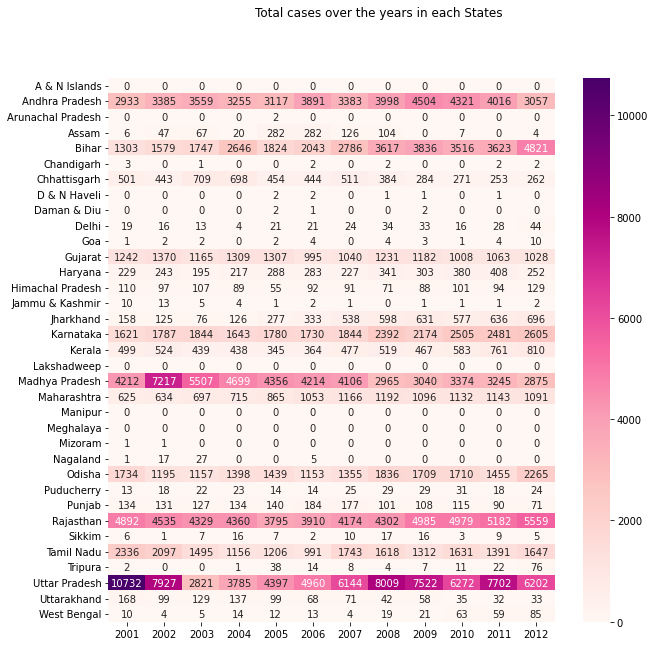

In [ ]:
plt.figure(figsize=(10, 10))
df_pivot = df[['STATE/UT', 'Year', 'Total']].pivot_table(values='Total', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='RdPu')
plt.suptitle('Total cases over the years in each States')
plt.xlabel('')
plt.ylabel('')
plt.show()

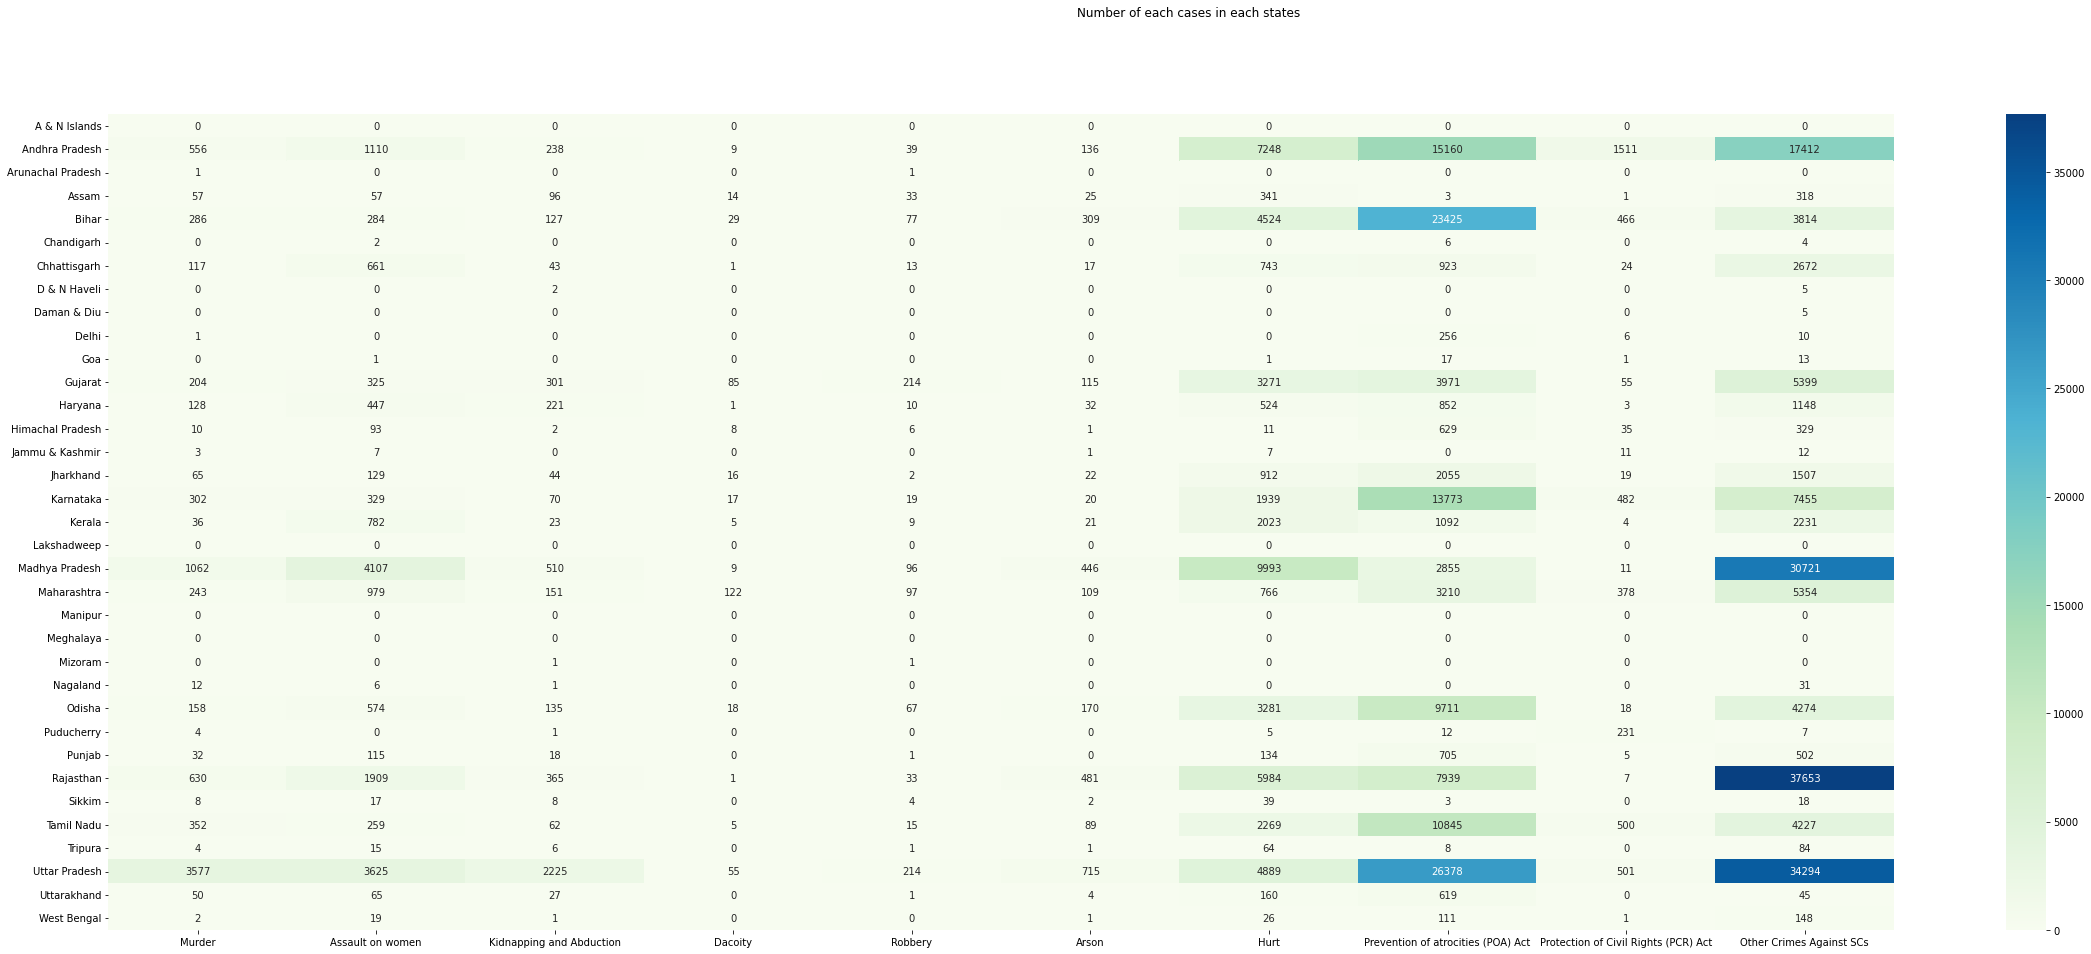

In [ ]:
plt.figure(figsize=(40, 15))
df_pivot = df.groupby('STATE/UT')[cols].sum()
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='GnBu')
plt.suptitle('Number of each cases in each states')
plt.xlabel('')
plt.ylabel('')
plt.show()

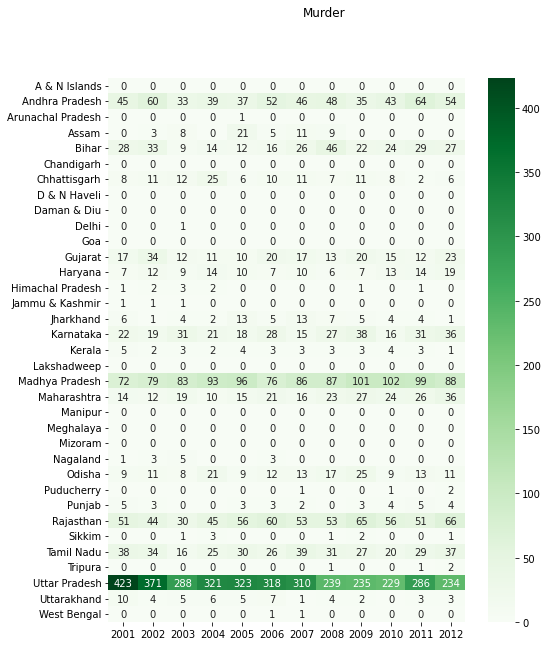

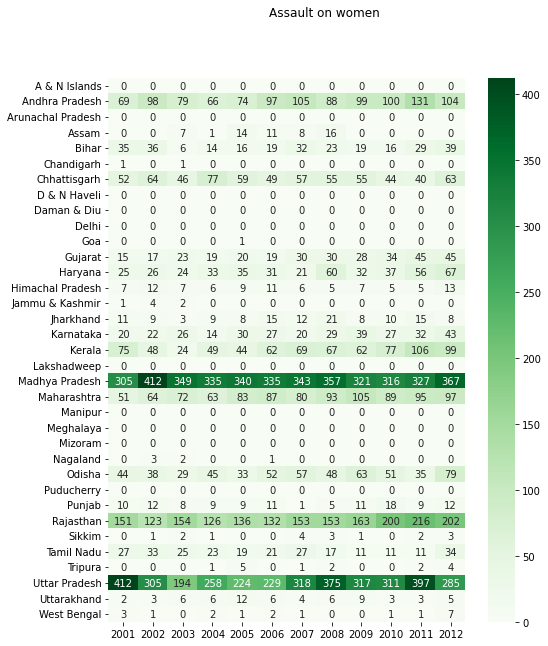

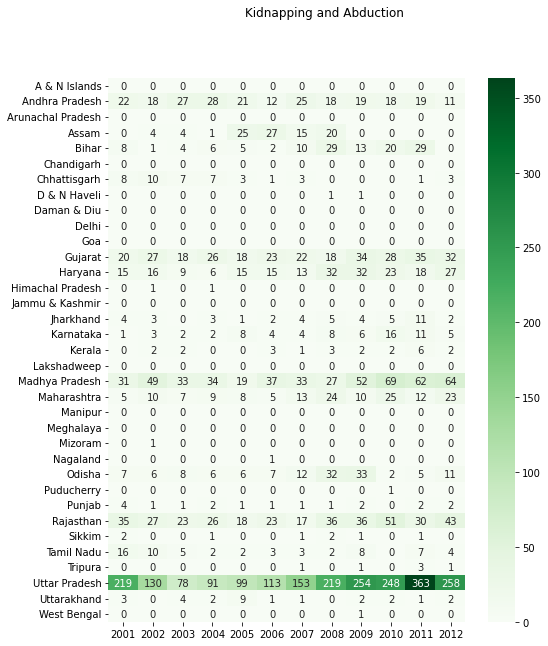

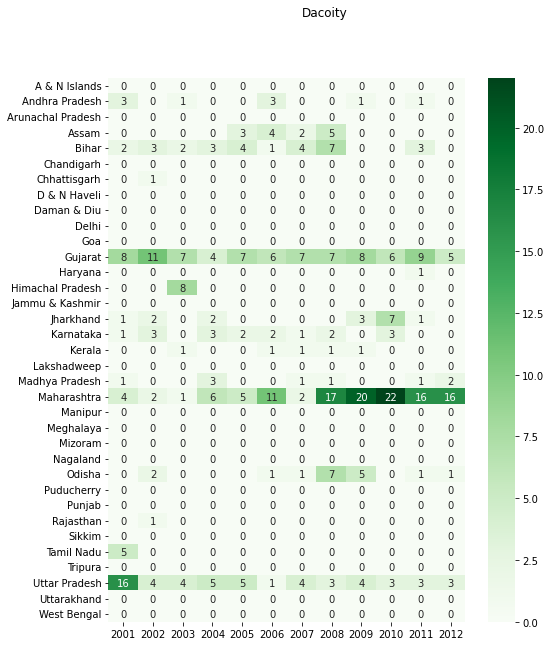

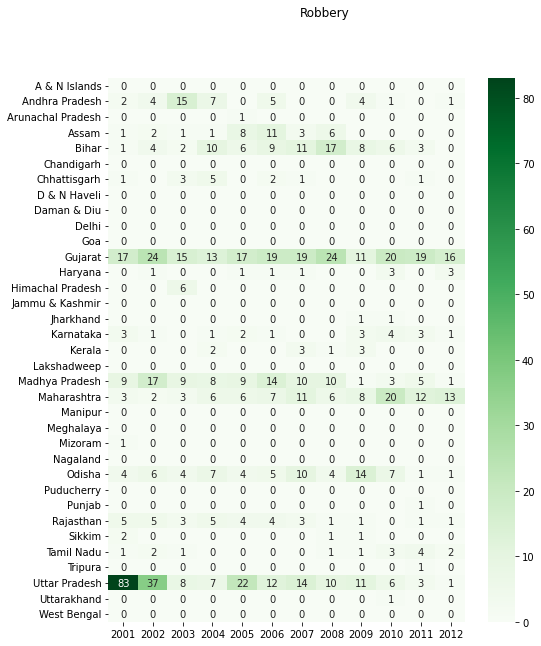

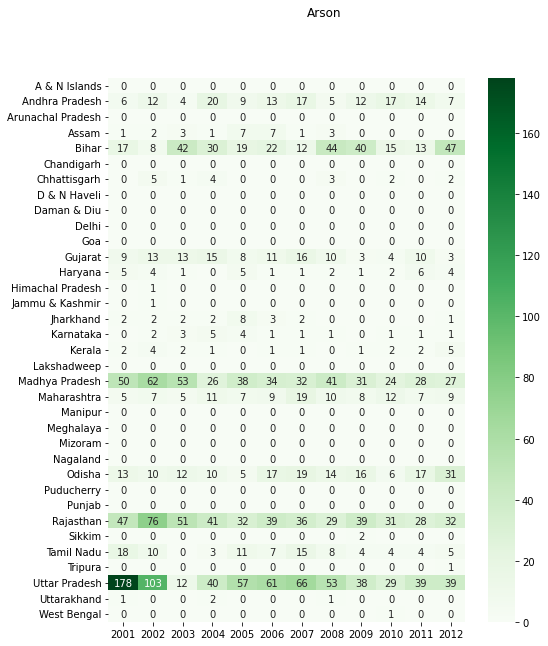

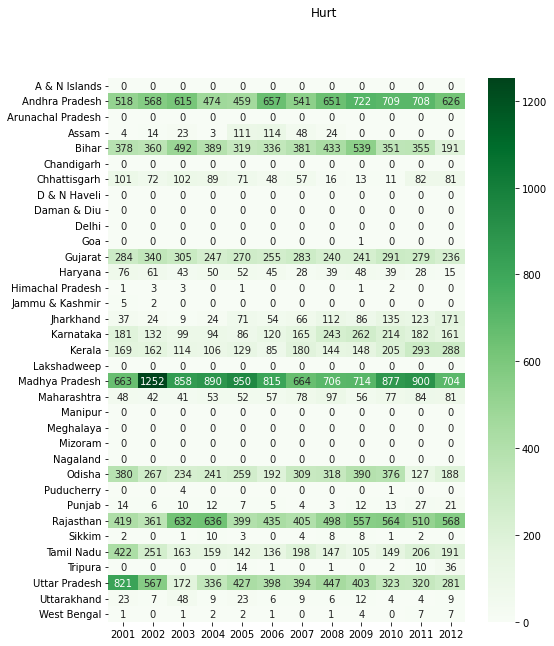

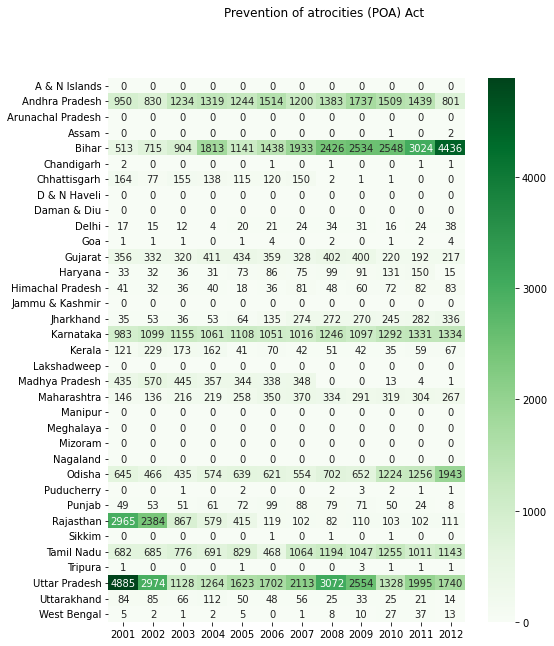

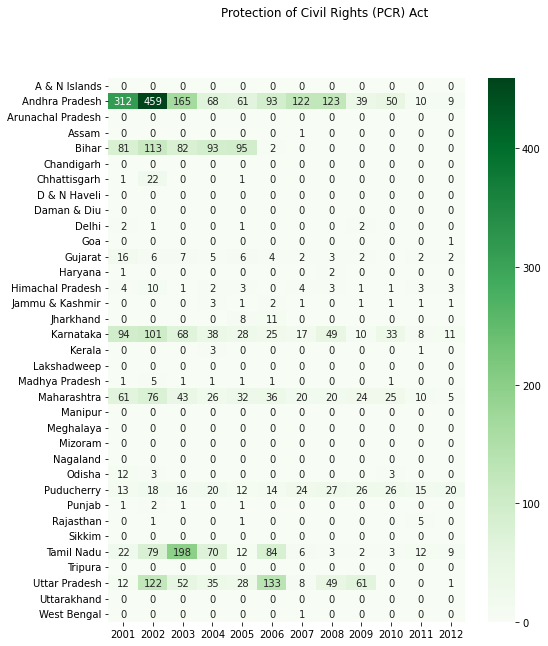

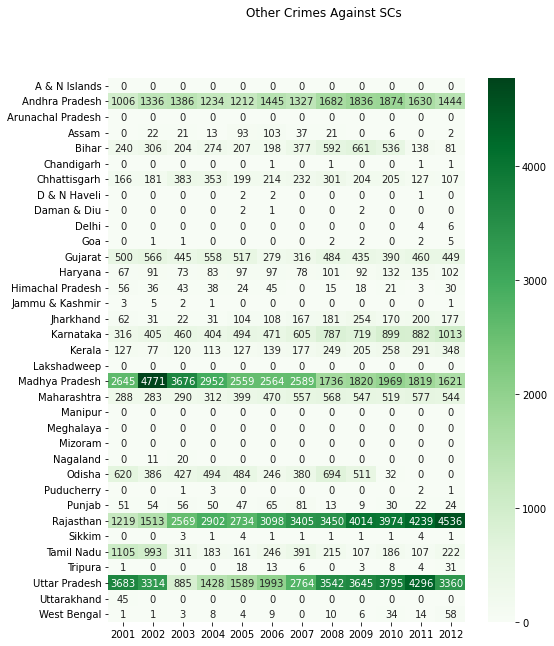

In [ ]:
for i in cols:
    plt.figure(figsize=(8, 10))
    df_pivot = df[['STATE/UT', 'Year', i]].pivot_table(values=i, index='STATE/UT', columns='Year', aggfunc='sum')
    sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
    plt.suptitle(i)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

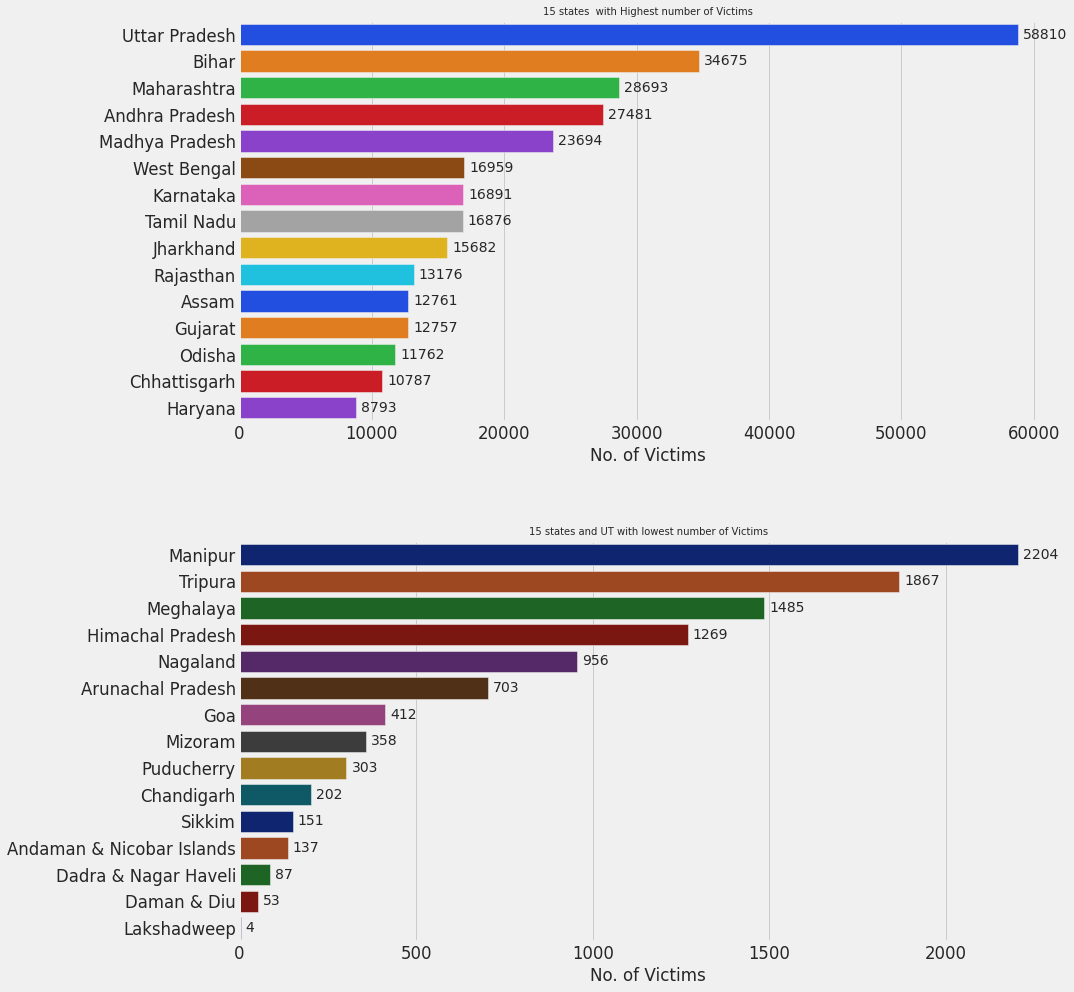

In [93]:
murders = murder[murder['Sub_Group_Name']== '3. Total']   #we need only total number of victims per state
murders= murders.groupby(['Area_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index()
 
murdersbad = murders.head(15) #top highest states
murdersgood = murders.tail(15) #top lowest states/ut

#sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

f , axes = plt.subplots(2,1, figsize = (15,14))
ax = sns.barplot(x = 'Victims_Total' , y = 'Area_Name' , data = murdersbad, ax = axes[0],palette= 'bright') #barplot for highest numbers of victims per state
axes[0].set_title("15 states  with Highest number of Victims", size = 10)
axes[0].set_ylabel('')
axes[0].set_xlabel('No. of Victims')
ax1 = sns.barplot(x = 'Victims_Total' , y = 'Area_Name' , data = murdersgood, ax = axes[1],palette= 'dark' )#barplot for lowest numbers of victims per state
axes[1].set_title("15 states and UT with lowest number of Victims", size = 10)
axes[1].set_ylabel('')
axes[1].set_xlabel('No. of Victims')
plt.tight_layout()  #tight layout so that subplots look fitted
plt.subplots_adjust(hspace= .3) #adjusting the space between the plots
#murders.to_csv('murder.csv',index=False)
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

for p in ax1.patches:
        ax1.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

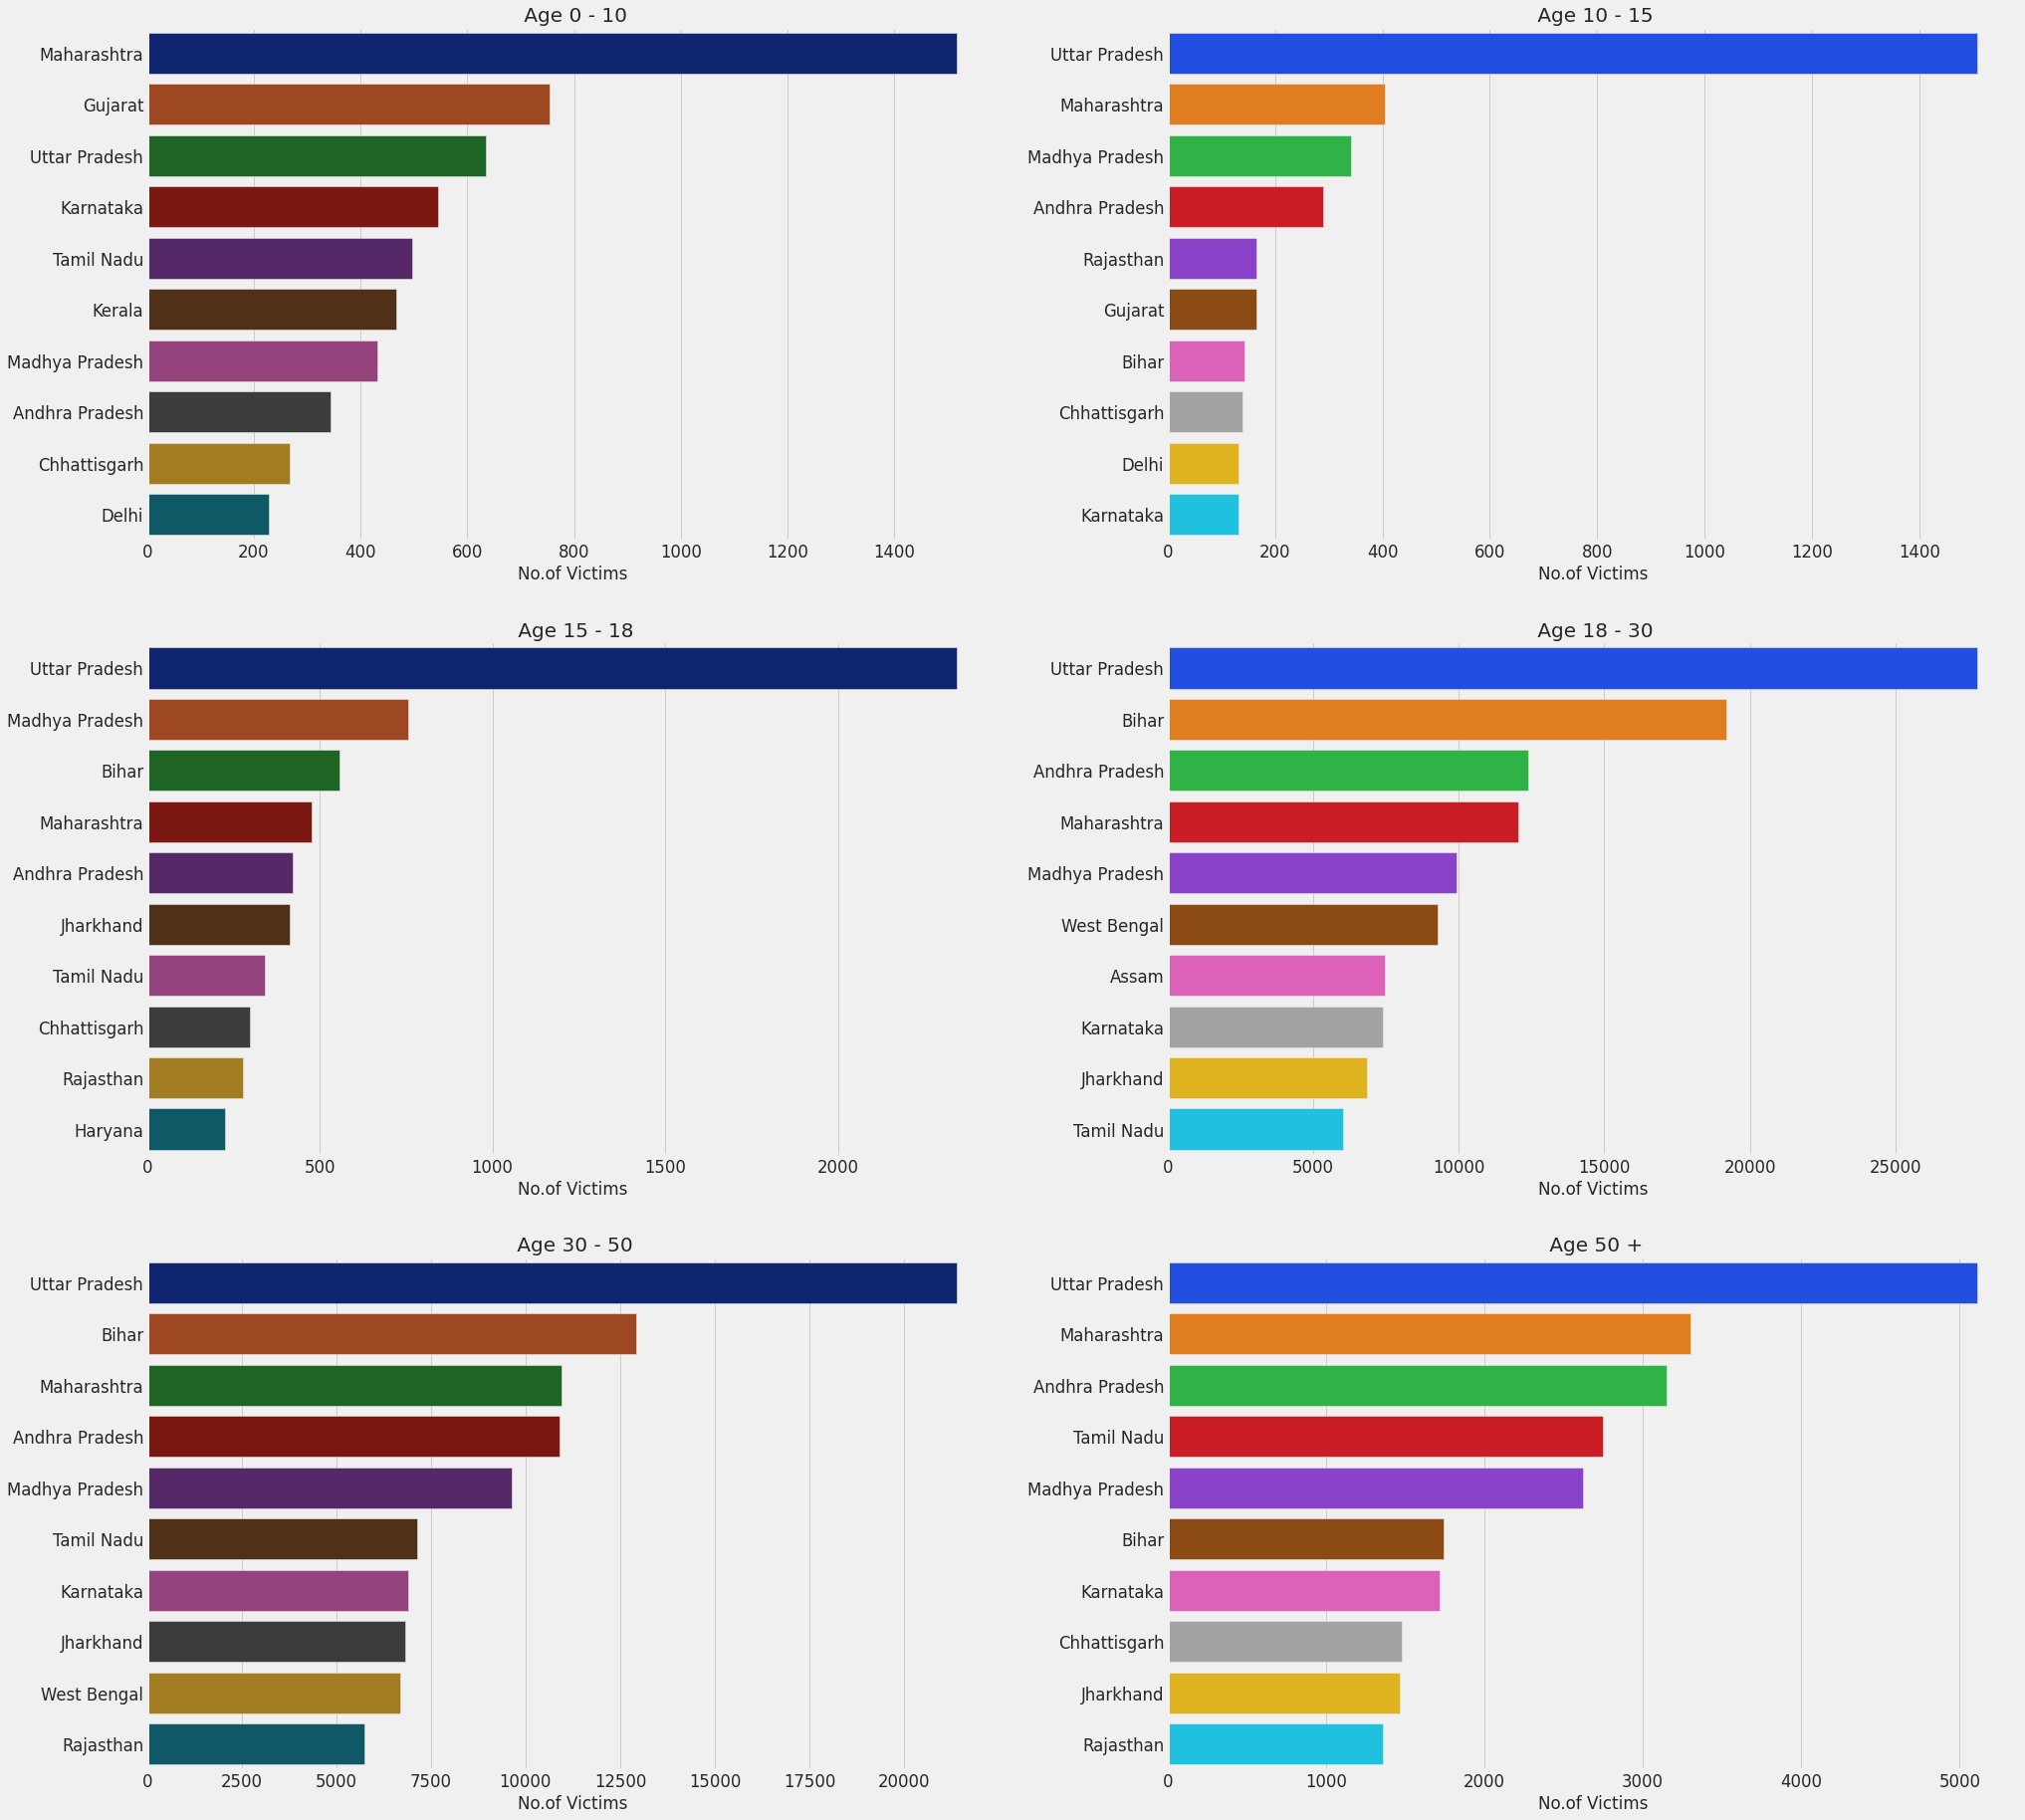

<Figure size 1008x1080 with 0 Axes>

In [94]:
murdernt = murder[murder['Sub_Group_Name']== '3. Total']
murdersa = murdernt.groupby(['Area_Name'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs', 
                                           'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                           'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index() #grouping with state and age group
murdersa = murdersa.melt('Area_Name', var_name='AgeGroup',  value_name='vals') #melting the dataset

sns.set_style("darkgrid")
sns.set_context("talk")
plt.style.use("fivethirtyeight")


f, axes = plt.subplots(3,2, figsize = (30,30))
plt.figure(figsize = (14,15))
sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_10_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[0,0],palette= 'dark')
axes[0,0].set_title(' Age 0 - 10', size = 20)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('No.of Victims')

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_10_15_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[0,1],palette= 'bright' )
axes[0,1].set_title(' Age 10 - 15', size = 20)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('No.of Victims')    


sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_15_18_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[1,0],palette= 'dark')
axes[1,0].set_title(' Age 15 - 18', size = 20)
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('No.of Victims')  
sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_18_30_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[1,1],palette= 'bright' )
axes[1,1].set_title(' Age 18 - 30', size = 20)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_30_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[2,0],palette= 'dark')
axes[2,0].set_title(' Age 30 - 50', size = 20)
axes[2,0].set_ylabel('')
axes[2,0].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Above_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[2,1],palette= 'bright')
axes[2,1].set_title(' Age 50 +', size = 20)
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('No.of Victims')

plt.tight_layout()